### 네이버 스포츠 뉴스

In [25]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')

In [26]:
url = 'https://sports.news.naver.com/general/news/index?isphoto=N&view=text'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver')
driver.get(url)
time.sleep(3)

In [31]:
lis = driver.find_elements(By.XPATH, '//*[@id="_newsList"]/ul/li')
len(lis)

20

In [39]:
lines = []
url = 'https://sports.news.naver.com/general/news/index?isphoto=N&view=text'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver')
driver.get(url)
time.sleep(3)

lis = driver.find_elements(By.XPATH, '//*[@id="_newsList"]/ul/li')

for i in range(4):
    if i > 0:
        driver.find_element(By.XPATH, f'//*[@id="_pageList"]/a[{i}]').click()
        time.sleep(2)
        lis = driver.find_elements(By.XPATH, '//*[@id="_newsList"]/ul/li')
    for li in lis:
        title = li.find_element(By.CLASS_NAME, 'title').text
        lines.append(title)

In [41]:
lines

["2007년생·세계 194위 안드레예바, 톱 랭커 연파 '파란'",
 "사감위 위원장, 경마현장 방문 '건전화 추진 현황 점검'",
 '[서울오픈챌린저] 정윤성, 국내 선수 중 유일하게 준결승 안착',
 '대한장애인체육회, 롯데칠성음료와 업무협약 체결',
 '인제스피디움, ‘인제 마스터즈 시리즈’ 총 4라운드 개최',
 "'토르' 박시훈, 아시아청소년육상 투포환 우승…20ｍ11 대회신기록",
 '"바둑은 제 인생"… 레전드 유창혁, 대주배 첫 우승',
 '낫소-한국빠델협회, 에어돔 시설 및 용품 관련 업무 협약',
 '[서울오픈챌린저] 홍성찬, 8강서 중국 선수에게 석패',
 "대전체육회 '꿈드림프로젝트' 선발…태권도 이한나 등 8명",
 '‘화끈한’ 송야동, 레슬러 벽 넘을까 [찐팬의 UFC TALK]',
 "제주판 '모세의 기적' 서건도서 몰래 캠핑하다 불낸 30대 남녀",
 '신상진 성남시장, 제13회 경기도장애인체육대회 개회식 참석',
 "2007년생 안드레예바, 여자 테니스 세계 톱 랭커 연파 '파란'",
 "'우상혁 라이벌' 바르심, 서아시아 대회서 훈련하듯 우승…2ｍ20",
 '라마 잭슨, 700억원으로 NFL 연봉왕 등극, 전 세계 최고는 누구?',
 '강릉 체육행사 풍성…"산불 피해 지역에 희망을 주세요"',
 '[알카라스 경기분석해보니] “포핸드는 ‘양날의 검’”...수비에 약점, 백핸드보다 실책 많다',
 '세계 194위 15세 안드리바, 女프로테니스서 ‘돌풍’',
 '펜싱 어벤저스, 안방서 사브르 그랑프리 金 도전',
 '무주군, 물놀이 지역 12곳에 스마트안전감시시스템 설치',
 '15세 테니스 소녀, 세계 14위도 격파…마드리드오픈 3R 진출 기염',
 "'토르' 박시훈, 아시아청소년육상 투포환 우승…20ｍ11 대회新",
 '충북체고 양궁부, 57회 전국남여종별선수권서 대회신기록 수립',
 '이가 시비옹테크, "WTA와 ATP 상금을 공평하게 분배해 달라"',
 "전국생활체육대축전, '황금알 낳는 거위'인 까닭",
 '“테린이 모여라

In [45]:
titles = ' '.join(lines)
titles

'2007년생·세계 194위 안드레예바, 톱 랭커 연파 \'파란\' 사감위 위원장, 경마현장 방문 \'건전화 추진 현황 점검\' [서울오픈챌린저] 정윤성, 국내 선수 중 유일하게 준결승 안착 대한장애인체육회, 롯데칠성음료와 업무협약 체결 인제스피디움, ‘인제 마스터즈 시리즈’ 총 4라운드 개최 \'토르\' 박시훈, 아시아청소년육상 투포환 우승…20ｍ11 대회신기록 "바둑은 제 인생"… 레전드 유창혁, 대주배 첫 우승 낫소-한국빠델협회, 에어돔 시설 및 용품 관련 업무 협약 [서울오픈챌린저] 홍성찬, 8강서 중국 선수에게 석패 대전체육회 \'꿈드림프로젝트\' 선발…태권도 이한나 등 8명 ‘화끈한’ 송야동, 레슬러 벽 넘을까 [찐팬의 UFC TALK] 제주판 \'모세의 기적\' 서건도서 몰래 캠핑하다 불낸 30대 남녀 신상진 성남시장, 제13회 경기도장애인체육대회 개회식 참석 2007년생 안드레예바, 여자 테니스 세계 톱 랭커 연파 \'파란\' \'우상혁 라이벌\' 바르심, 서아시아 대회서 훈련하듯 우승…2ｍ20 라마 잭슨, 700억원으로 NFL 연봉왕 등극, 전 세계 최고는 누구? 강릉 체육행사 풍성…"산불 피해 지역에 희망을 주세요" [알카라스 경기분석해보니] “포핸드는 ‘양날의 검’”...수비에 약점, 백핸드보다 실책 많다 세계 194위 15세 안드리바, 女프로테니스서 ‘돌풍’ 펜싱 어벤저스, 안방서 사브르 그랑프리 金 도전 무주군, 물놀이 지역 12곳에 스마트안전감시시스템 설치 15세 테니스 소녀, 세계 14위도 격파…마드리드오픈 3R 진출 기염 \'토르\' 박시훈, 아시아청소년육상 투포환 우승…20ｍ11 대회新 충북체고 양궁부, 57회 전국남여종별선수권서 대회신기록 수립 이가 시비옹테크, "WTA와 ATP 상금을 공평하게 분배해 달라" 전국생활체육대축전, \'황금알 낳는 거위\'인 까닭 “테린이 모여라”…하나증권, 테니스 페스티벌 개최 \'동호인 출신 태극마크\' 주재훈의 꿈…양궁 컴파운드[주목! 이 종목] 대한산악연맹, 솔병원과 2024년까지 공식지정병

In [42]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [43]:
sw_wc = STOPWORDS

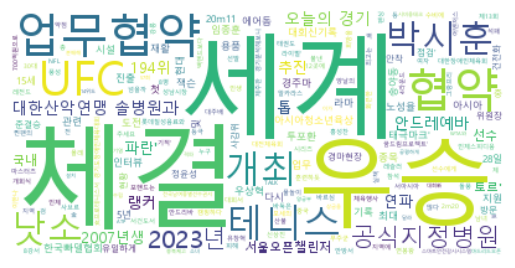

In [51]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate(titles)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');